In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

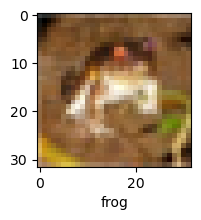

In [10]:
plot_sample(X_train, y_train, 0)

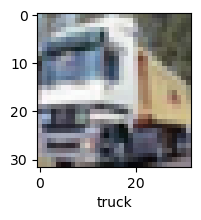

In [11]:
plot_sample(X_train, y_train, 1)

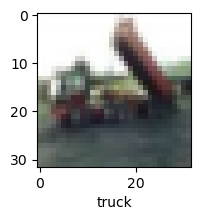

In [12]:
plot_sample(X_train, y_train, 2)

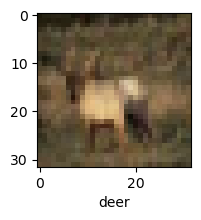

In [13]:
plot_sample(X_train, y_train, 3)

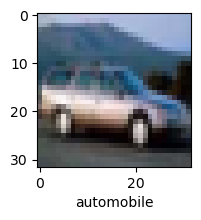

In [14]:
plot_sample(X_train, y_train, 4)

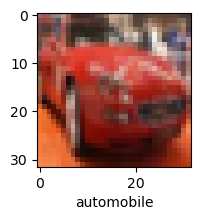

In [15]:
plot_sample(X_train, y_train, 5)

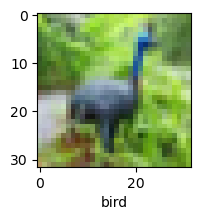

In [16]:
plot_sample(X_train, y_train, 6)

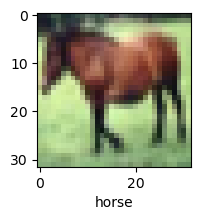

In [17]:
plot_sample(X_train, y_train, 7)

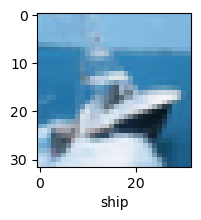

In [18]:
plot_sample(X_train, y_train, 8)

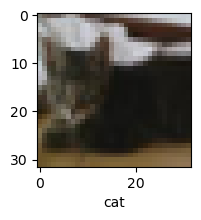

In [19]:
plot_sample(X_train, y_train, 9)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\GAURAV SINGH\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.3033 - loss: 1.9338
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4186 - loss: 1.6427
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.4577 - loss: 1.5505
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.4719 - loss: 1.4901
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.4940 - loss: 1.4332


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.32      0.81      0.46      1000
           1       0.61      0.59      0.60      1000
           2       0.42      0.20      0.27      1000
           3       0.46      0.12      0.20      1000
           4       0.35      0.54      0.42      1000
           5       0.40      0.37      0.38      1000
           6       0.55      0.40      0.47      1000
           7       0.48      0.60      0.53      1000
           8       0.65      0.42      0.51      1000
           9       0.64      0.41      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.43     10000
weighted avg       0.49      0.45      0.43     10000



In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\GAURAV SINGH\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3667 - loss: 1.7436
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5709 - loss: 1.2238
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6346 - loss: 1.0516
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6662 - loss: 0.9618
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6911 - loss: 0.8986
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7077 - loss: 0.8438
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7282 - loss: 0.7882
Epoch 8/10
 573/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7363 - loss: 0.7421

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

In [ ]:
plot_sample(X_test, y_test,5)

In [ ]:
plot_sample(X_test, y_test,1)

In [ ]:
plot_sample(X_test, y_test,7)

In [ ]:
plot_sample(X_test, y_test,9)

In [ ]:
plot_sample(X_test, y_test,7)